In [2]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import inspect

## Import data

In [136]:
#Importing P&L data for each company
abnovatarus_pl=pd.read_csv('./P&L/P&L AB NOVATARUS.csv')
amrest_pl=pd.read_csv('./P&L/P&L Amrest.csv')
mex_pl=pd.read_csv('./P&L/P&L Mex.csv')
rainbow_pl=pd.read_csv('./P&L/P&L Rainbow.csv')
sfinks_pl=pd.read_csv('./P&L/P&L Sfinks.csv')
tmr_pl=pd.read_csv('./P&L/P&L Tatry Mountain Resort.csv')

In [135]:
#Importing B/S data for each company
abnovatarus_bs=pd.read_csv('./B:S/b_s AB NOVATARUS.csv')
amrest_bs=pd.read_csv('./B:S/b_s Amrest.csv')
mex_bs=pd.read_csv('./B:S/b_s Mex.csv')
rainbow_bs=pd.read_csv('./B:S/b_s Rainbow.csv')
sfinks_bs=pd.read_csv('./B:S/b_s Sfinks.csv')
tmr_bs=pd.read_csv('./B:S/b_s Tatry Mountain Resort.csv')

## Data cleaning

In [333]:
def modify_dataframe(dictionary, desired_years):
    modified_dict = {}
    for company_name, company_df in dictionary.items():
        selected_columns = ['Unnamed: 0'] + [col for col in company_df.columns if any(year in col for year in desired_years)]
        modified_company = company_df[selected_columns].copy()

        for col in selected_columns:
            if col != 'Unnamed: 0':
                modified_company[col] = pd.to_numeric(modified_company[col].str.replace(' ', ''), errors='coerce', downcast='integer')

        modified_dict[company_name] = modified_company

    return modified_dict

def transform_and_transpose(df_dict):
    transformed_dict = {}
    for company_name, company_df in df_dict.items():
        cleaned_company_name = company_name.replace('_bs', '').upper()
        selected_df = company_df
        df_transposed = selected_df.set_index('Unnamed: 0').T

        # Wyodrębnienie roku z indeksu
        df_transposed.index = df_transposed.index.str.extract(r'(\d{4})', expand=False)

        df_transposed.index.name = 'Year'
        
        # Usunięcie kolumny 'Data publikacji'
        df_transposed = df_transposed.drop(columns='Data publikacji', errors='ignore')
        
        df_transposed['Company'] = cleaned_company_name
        transformed_dict[cleaned_company_name] = df_transposed

    return transformed_dict

desired_years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
df_pl = {'abnovatarus_pl': abnovatarus_pl, 'amrest_pl': amrest_pl, 'mex_pl': mex_pl, 'rainbow_pl': rainbow_pl, 'sfinks_pl': sfinks_pl, 'tmr_pl': tmr_pl}
df_bs = {'abnovatarus_bs': abnovatarus_bs, 'amrest_bs': amrest_bs, 'mex_bs': mex_bs, 'rainbow_pl': rainbow_bs, 'sfinks_pl': sfinks_bs, 'tmr_pl': tmr_bs}

df_pl = modify_dataframe(df_pl, desired_years)
df_bs = modify_dataframe(df_bs, desired_years)

df_pl_transformed = transform_and_transpose(df_pl)
df_bs_transformed = transform_and_transpose(df_bs)

## Sales dynamics

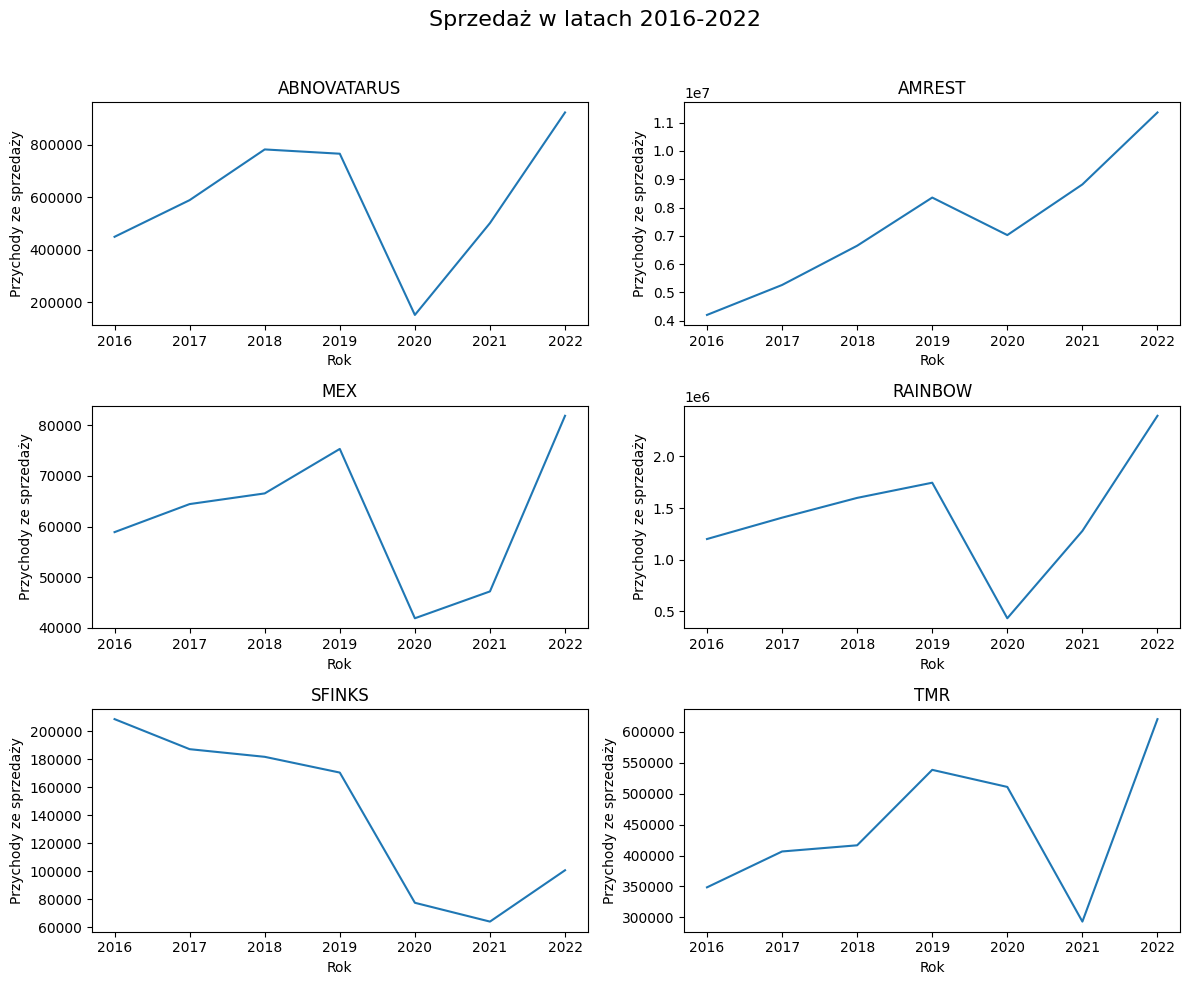

In [378]:
def plot_sales(df_dict):
    fig, axes = plt.subplots(3, 2, figsize=(12, 10))
    fig.suptitle('Sprzedaż w latach 2016-2022', fontsize=16)

    for (company_name, df_transposed), ax in zip(df_dict.items(), axes.flatten()):
        cleaned_company_name = company_name.replace('_PL', '').upper()
        
        if 'Przychody ze sprzedaży' in df_transposed.columns:
            sns.lineplot(data=df_transposed["Przychody ze sprzedaży"], ax=ax)
            ax.set_title(cleaned_company_name)
            ax.set_xlabel('Rok')
            ax.set_ylabel('Przychody ze sprzedaży')
        else:
            print(f'Brak kolumny "Przychody ze sprzedaży" dla {company_name}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Poprawia odstępy, aby tytuł nie przycinał się
    plt.show()

# Użyj funkcji plot_sales na przekształconych danych
plot_sales(df_pl_transformed)


## ROS

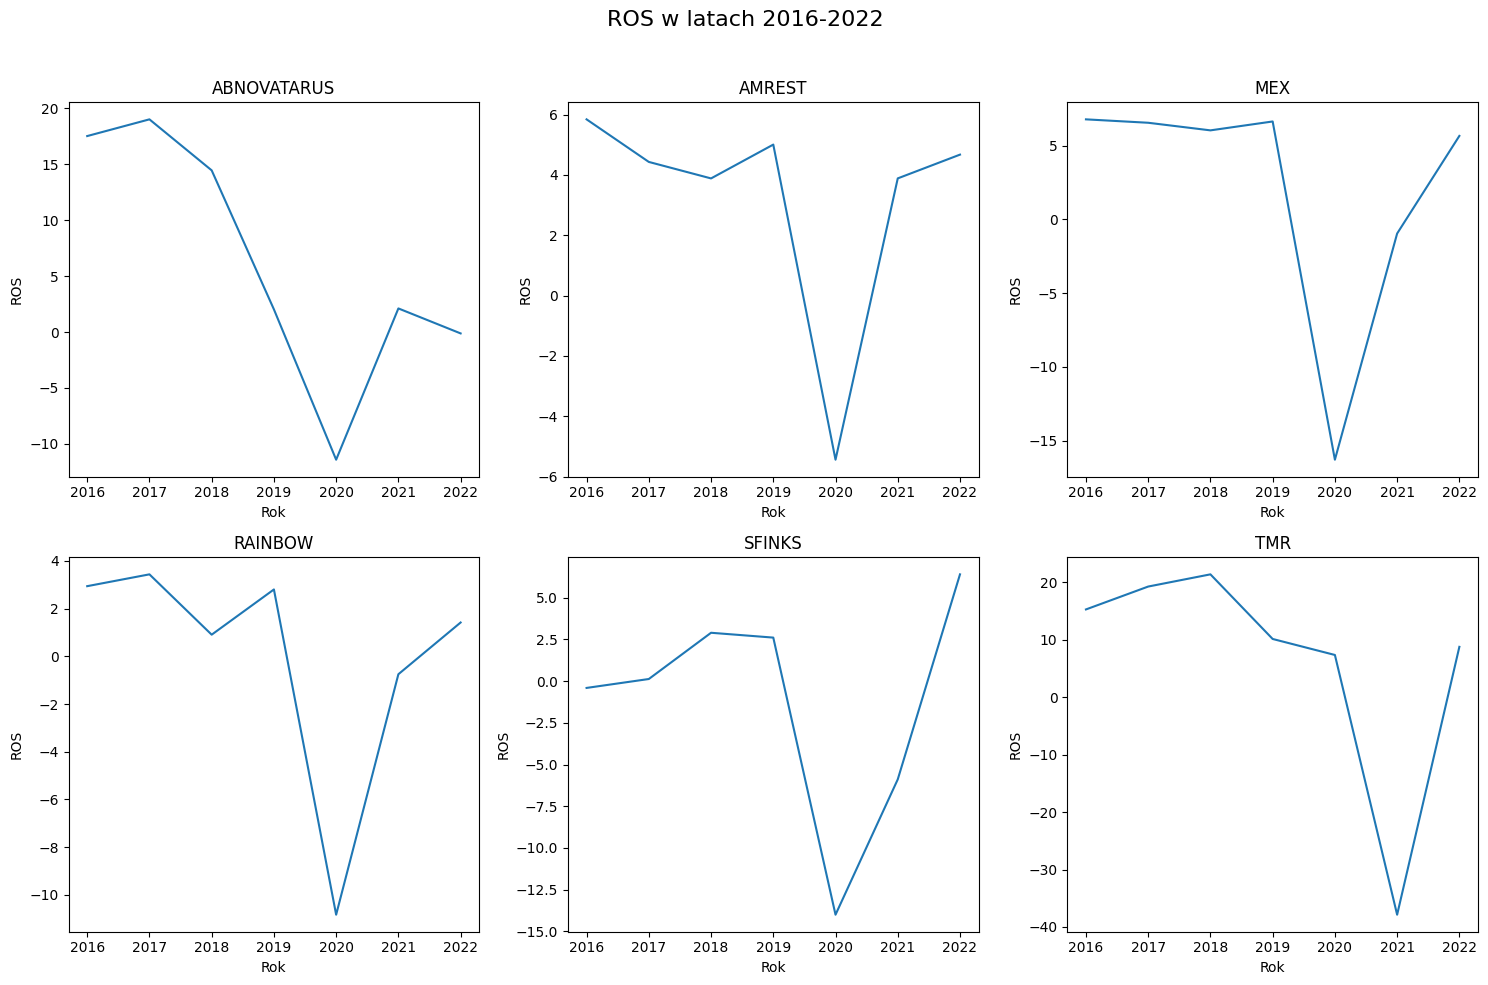

In [377]:
def plot_ros(df_dict):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('ROS w latach 2016-2022', fontsize=16)

    for (company_name, df_transposed), ax in zip(df_dict.items(), axes.flatten()):
        cleaned_company_name = company_name.replace('_PL', '').upper()
        
        if 'Zysk ze sprzedaży' in df_transposed.columns and 'Przychody ze sprzedaży' in df_transposed.columns:
            ROS = df_transposed['Zysk ze sprzedaży'] / df_transposed['Przychody ze sprzedaży'] * 100
            sns.lineplot(data=ROS, ax=ax)
            ax.set_title(cleaned_company_name)
            ax.set_xlabel('Rok')
            ax.set_ylabel('ROS')
        else:
            print(f'Brak kolumn "Zysk ze sprzedaży" lub "Przychody ze sprzedaży" dla {company_name}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Poprawia odstępy, aby tytuł nie przycinał się
    plt.show()

# Użyj funkcji plot_ros na przekształconych danych
plot_ros(df_pl_transformed)

## ROE

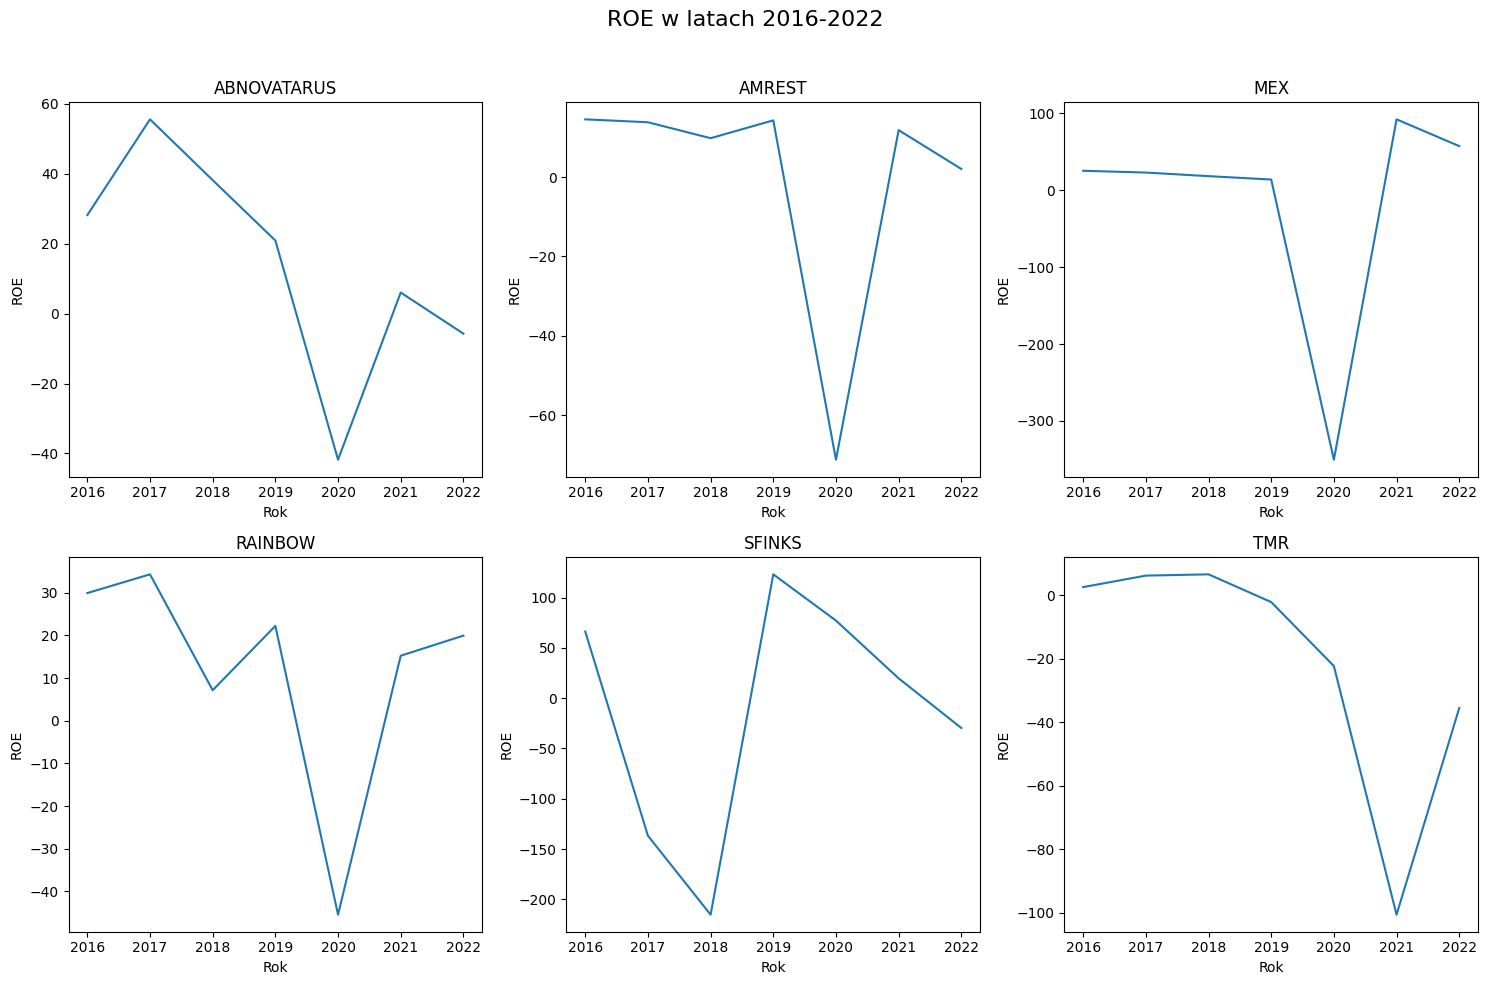

In [355]:
def plot_roe(df_pl_transformed, df_bs_transformed):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('ROE w latach 2016-2022', fontsize=16)

    for (pl_company_name, pl_df_transposed), (bs_company_name, bs_df_transposed), ax in zip(df_pl_transformed.items(), df_bs_transformed.items(), axes.flatten()):
        cleaned_company_name = pl_company_name.replace('_PL', '').upper()
        
        if 'Zysk netto' in pl_df_transposed.columns and 'Kapitał własny akcjonariuszy jednostki dominującej' in bs_df_transposed.columns:
            ROE = pl_df_transposed['Zysk netto'] / bs_df_transposed['Kapitał własny akcjonariuszy jednostki dominującej'] * 100
            sns.lineplot(data=ROE, ax=ax)
            ax.set_title(cleaned_company_name)
            ax.set_xlabel('Rok')
            ax.set_ylabel('ROE')
        else:
            print(f'Brak kolumn "Zysk netto" lub "Kapitał własny" dla {pl_company_name}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Poprawia odstępy, aby tytuł nie przycinał się
    plt.show()

# Użyj funkcji plot_roe na przekształconych danych
plot_roe(df_pl_transformed, df_bs_transformed)


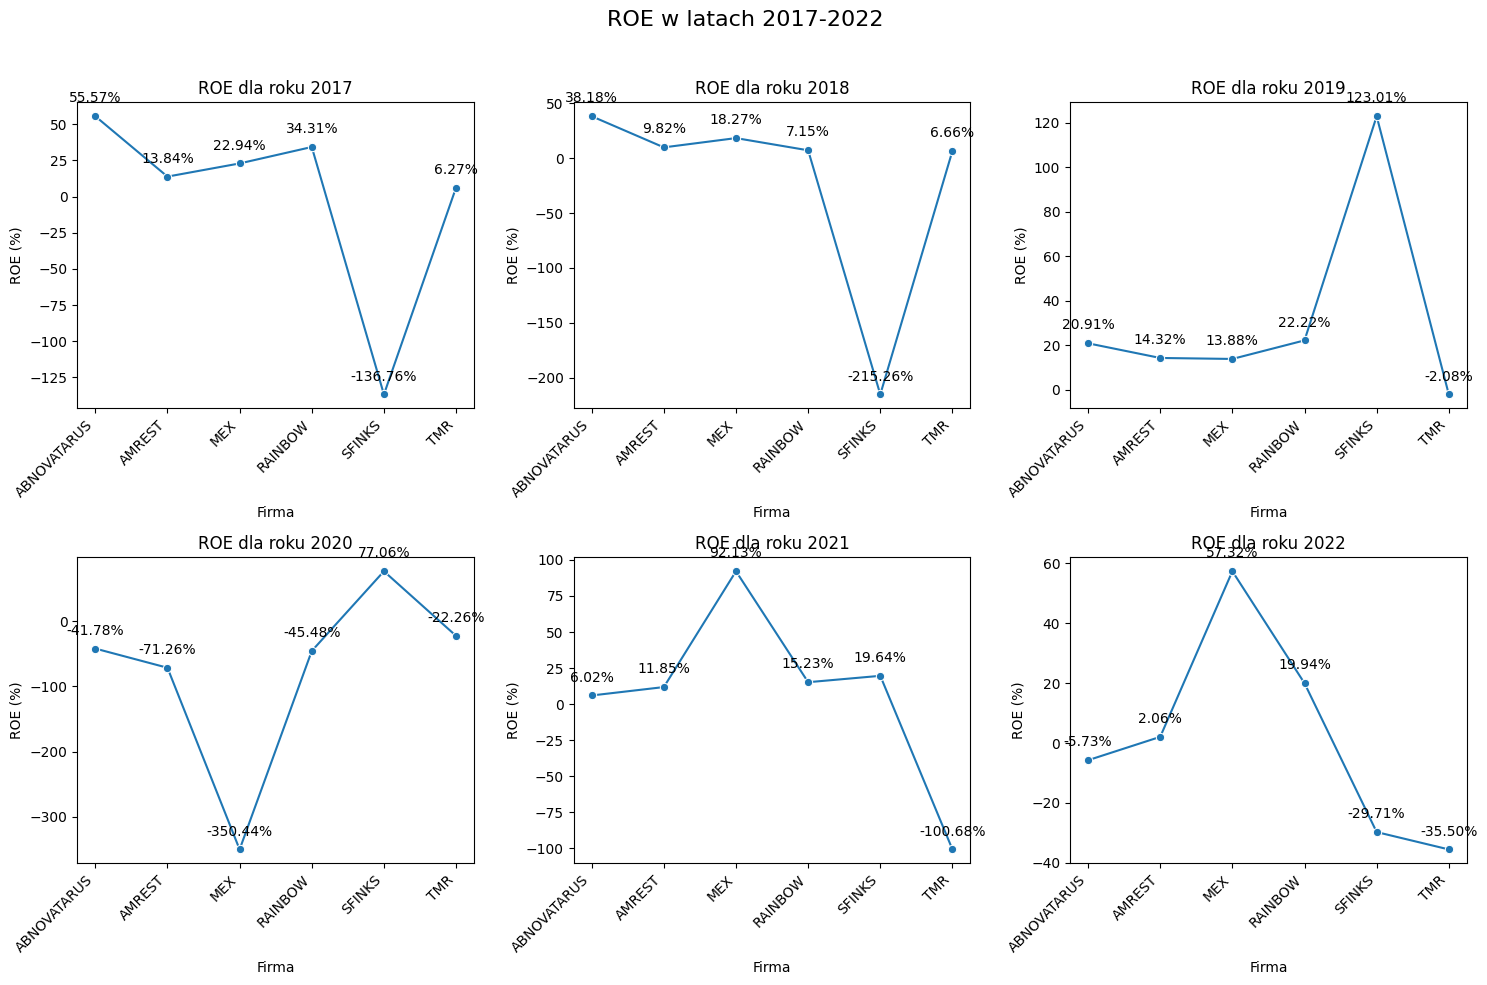

In [379]:
def plot_roe_for_all_years(df_pl_transformed, df_bs_transformed):
    years = ['2017', '2018', '2019', '2020', '2021', '2022']
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('ROE w latach 2017-2022', fontsize=16)

    for year, ax in zip(years, axes.flatten()):
        roe_data = []

        for (pl_company_name, pl_df_transposed), (bs_company_name, bs_df_transposed) in zip(df_pl_transformed.items(), df_bs_transformed.items()):
            cleaned_company_name = pl_company_name.replace('_PL', '').upper()

            if 'Zysk netto' in pl_df_transposed.columns and 'Kapitał własny akcjonariuszy jednostki dominującej' in bs_df_transposed.columns:
                try:
                    roe_value = (pl_df_transposed.loc[str(year), 'Zysk netto'] / bs_df_transposed.loc[str(year), 'Kapitał własny akcjonariuszy jednostki dominującej']) * 100
                    roe_data.append({'Company': cleaned_company_name, 'ROE': roe_value})
                except KeyError:
                    print(f'Brak danych dla roku {year} dla firmy {cleaned_company_name}')
            else:
                print(f'Brak kolumn "Zysk netto" lub "Kapitał własny" dla {pl_company_name}')

        if roe_data:
            roe_df = pd.DataFrame(roe_data)
            sns.lineplot(x='Company', y='ROE', data=roe_df, marker='o', ax=ax)
            ax.set_title(f'ROE dla roku {year}')
            ax.set_xlabel('Firma')
            ax.set_ylabel('ROE (%)')
            ax.set_xticks(range(len(roe_df['Company'])))
            ax.set_xticklabels(roe_df['Company'], rotation=45, ha='right')

            # Dodaj etykiety dla wartości ROE
            for index, row in roe_df.iterrows():
                ax.annotate(f'{row["ROE"]:.2f}%', (index, row['ROE']), textcoords="offset points", xytext=(0,10), ha='center')
        else:
            print(f'Brak danych do utworzenia wykresu ROE dla roku {year}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Poprawia odstępy, aby tytuł nie przycinał się
    plt.show()

# Użyj funkcji plot_roe_for_all_years
plot_roe_for_all_years(df_pl_transformed, df_bs_transformed)
